In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, roc_auc_score, 
                           roc_curve, classification_report)

# Advanced ML libraries
import xgboost as xgb
import lightgbm as lgb

# Deep Learning
from tensorflow import keras
from tensorflow.keras import layers

# Model persistence and interpretability
import joblib
import shap

# Utilities
import warnings
from scipy import stats

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
print(" Dataset Info:")
print(data.info())
print("\n" + "="*50)

print("\n Statistical Summary:")
display(data.describe())

print("\n First 5 rows:")
display(data.head())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
Non

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000



 First 5 rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Check for missing values
print(" Missing Values Analysis:")
missing_values = data.isnull().sum()
if missing_values.sum() == 0:
    print(" No missing values found!")
else:
    print(missing_values[missing_values > 0])

# Target variable distribution
print("\n Target Variable Distribution:")
target_counts = data['DEATH_EVENT'].value_counts()
print(f"Survived (0): {target_counts[0]} ({target_counts[0]/len(data)*100:.1f}%)")
print(f"Died (1): {target_counts[1]} ({target_counts[1]/len(data)*100:.1f}%)")

 Missing Values Analysis:
 No missing values found!

 Target Variable Distribution:
Survived (0): 203 (67.9%)
Died (1): 96 (32.1%)


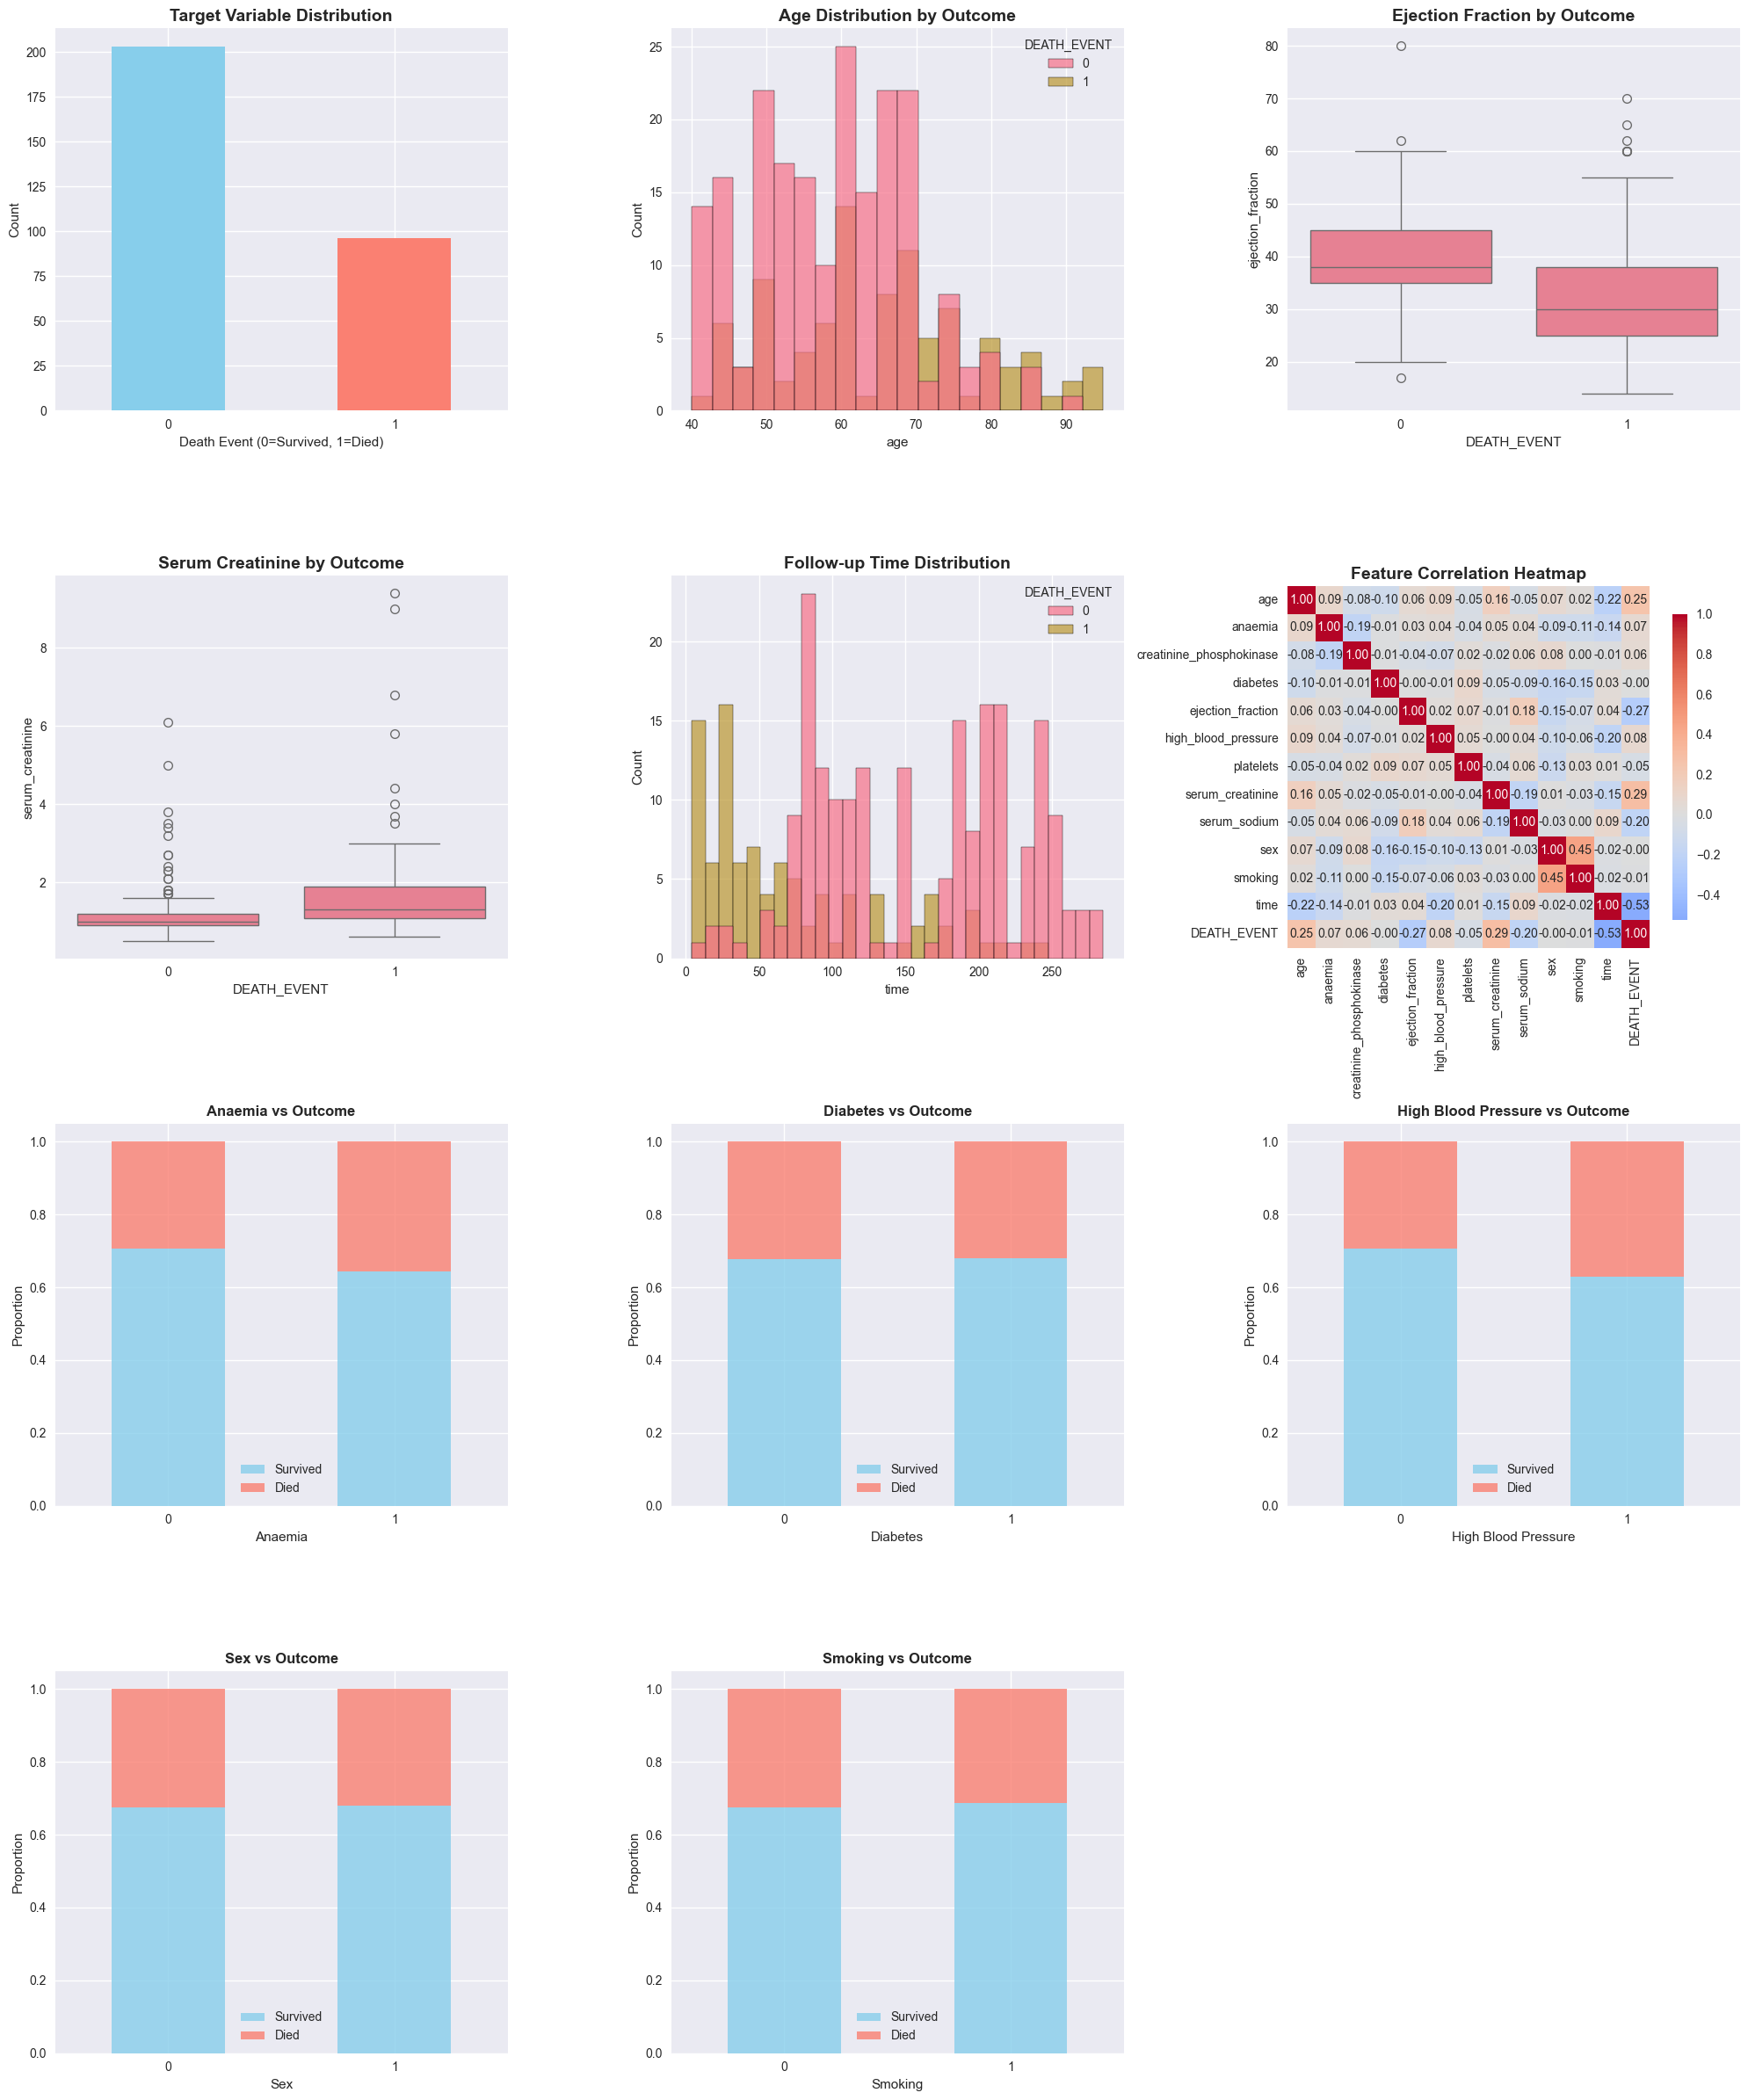

In [5]:
# Set up the plotting area for comprehensive EDA
fig = plt.figure(figsize=(20, 24))

# 1. Target variable distribution
plt.subplot(4, 3, 1)
data['DEATH_EVENT'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Death Event (0=Survived, 1=Died)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Age distribution by outcome
plt.subplot(4, 3, 2)
sns.histplot(data=data, x='age', hue='DEATH_EVENT', bins=20, alpha=0.7)
plt.title('Age Distribution by Outcome', fontsize=14, fontweight='bold')

# 3. Ejection fraction by outcome
plt.subplot(4, 3, 3)
sns.boxplot(data=data, x='DEATH_EVENT', y='ejection_fraction')
plt.title('Ejection Fraction by Outcome', fontsize=14, fontweight='bold')

# 4. Serum creatinine by outcome
plt.subplot(4, 3, 4)
sns.boxplot(data=data, x='DEATH_EVENT', y='serum_creatinine')
plt.title('Serum Creatinine by Outcome', fontsize=14, fontweight='bold')

# 5. Time distribution
plt.subplot(4, 3, 5)
sns.histplot(data=data, x='time', hue='DEATH_EVENT', bins=30, alpha=0.7)
plt.title('Follow-up Time Distribution', fontsize=14, fontweight='bold')

# 6. Correlation heatmap
plt.subplot(4, 3, 6)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

# 7-11. Categorical features analysis
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, 7 + i)
    crosstab = pd.crosstab(data[feature], data['DEATH_EVENT'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), 
                 color=['skyblue', 'salmon'], alpha=0.8)
    plt.title(f'{feature.replace("_", " ").title()} vs Outcome', fontsize=12, fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Proportion')
    plt.legend(['Survived', 'Died'])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

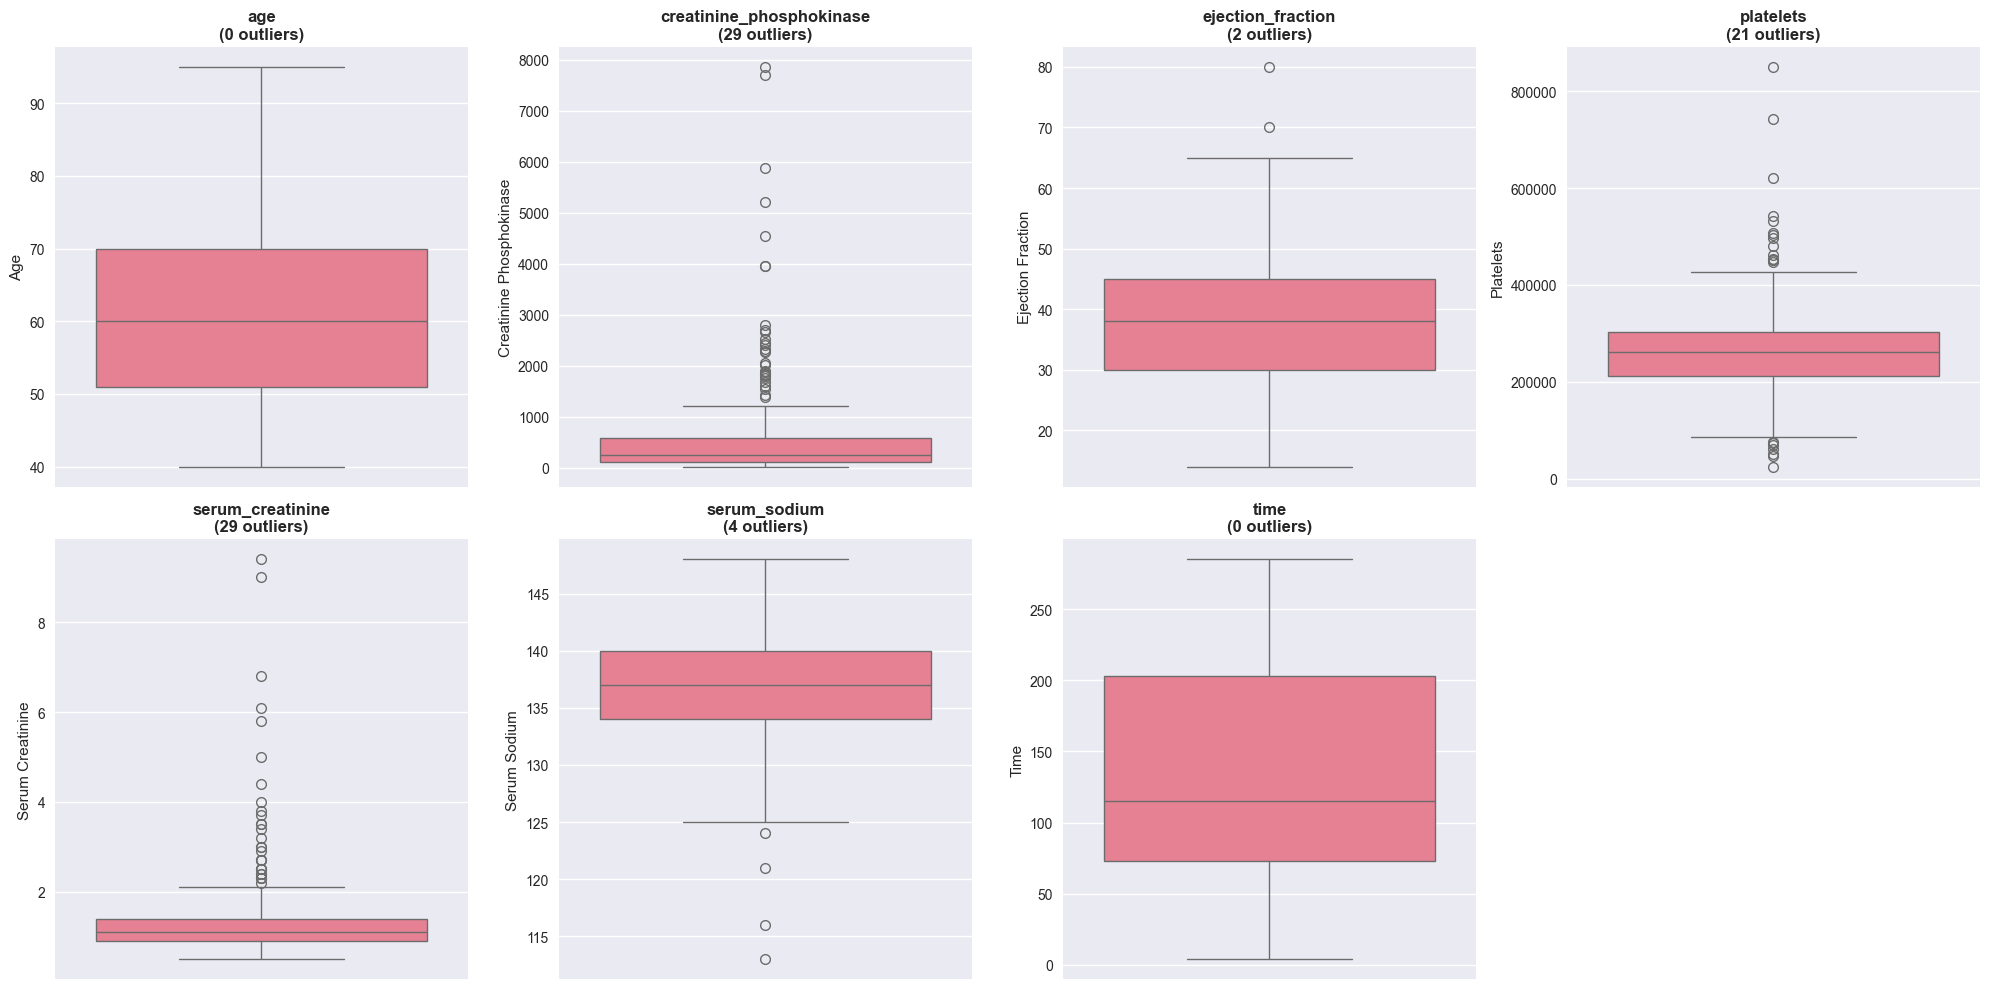

 Outlier Summary:
  age: 0 outliers (0.0%)
  creatinine_phosphokinase: 29 outliers (9.7%)
  ejection_fraction: 2 outliers (0.7%)
  platelets: 21 outliers (7.0%)
  serum_creatinine: 29 outliers (9.7%)
  serum_sodium: 4 outliers (1.3%)
  time: 0 outliers (0.0%)


In [6]:
# Outlier detection for numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

outlier_summary = {}

for i, feature in enumerate(numerical_features):
    # Calculate IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outlier_summary[feature] = len(outliers)
    
    # Create box plot
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f'{feature}\n({len(outliers)} outliers)', fontweight='bold')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

# Remove empty subplot
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

print(" Outlier Summary:")
for feature, count in outlier_summary.items():
    print(f"  {feature}: {count} outliers ({count/len(data)*100:.1f}%)")

In [7]:
# Separate features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

Features shape: (299, 12)
Target shape: (299,)
Feature names: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [8]:
# Handle missing values (if any)
if X.isnull().sum().sum() > 0:
    print("🔧 Handling missing values...")
    # Fill numerical columns with median
    numerical_cols = X.select_dtypes(include=[np.number]).columns
    X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
    
    # Fill categorical columns with mode
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = X[col].fillna(X[col].mode()[0])
else:
    print(" No missing values to handle")

 No missing values to handle


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution:")
print(y_train.value_counts(normalize=True))
print(f"Test target distribution:")
print(y_test.value_counts(normalize=True))

Training set: 239 samples
Test set: 60 samples
Training target distribution:
DEATH_EVENT
0    0.677824
1    0.322176
Name: proportion, dtype: float64
Test target distribution:
DEATH_EVENT
0    0.683333
1    0.316667
Name: proportion, dtype: float64


In [10]:
# Scale the features
print(" Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Data preprocessing completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

 Scaling features...
 Data preprocessing completed!
Scaled training data shape: (239, 12)
Scaled test data shape: (60, 12)


In [11]:
# Initialize results storage
results = {}
best_model = None
best_score = 0

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print(" Training machine learning models...")
print("=" * 50)

 Training machine learning models...


In [12]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n Training {name}...")
    
    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Train model
    model.fit(X_train_use, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Track best model
    if roc_auc > best_score:
        best_score = roc_auc
        best_model = (name, model)
    
    print(f" {name} - ROC-AUC: {roc_auc:.4f}")

print(f"\n Best ML Model so far: {best_model[0]} (ROC-AUC: {best_score:.4f})")


 Training Logistic Regression...
 Logistic Regression - ROC-AUC: 0.8588

 Training Random Forest...
 Random Forest - ROC-AUC: 0.8915

 Training XGBoost...
 XGBoost - ROC-AUC: 0.8318

 Training LightGBM...
 LightGBM - ROC-AUC: 0.8485

 Training SVM...
 SVM - ROC-AUC: 0.8447

 Training K-Nearest Neighbors...
 K-Nearest Neighbors - ROC-AUC: 0.8004

 Best ML Model so far: Random Forest (ROC-AUC: 0.8915)


In [13]:
# Build the neural network
print(" Building Deep Learning Model...")

dl_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

print(" Neural Network Architecture:")
dl_model.summary()

 Building Deep Learning Model...
 Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the deep learning model
print("🔄 Training Deep Learning model...")

history = dl_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
    ]
)

print(" Deep Learning model training completed!")

🔄 Training Deep Learning model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6754 - loss: 0.6798 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6507 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6702 - loss: 0.6503 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6358 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6859 - loss: 0.6277 - precision: 0.6667 - recall: 0.0645 - val_accuracy: 0.6875 - val_loss: 0.6172 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6754 - loss: 0.6208 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5978 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lear

In [15]:
# Evaluate deep learning model
y_pred_proba_dl = dl_model.predict(X_test_scaled).flatten()
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

# Calculate metrics for DL model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl)
recall_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)
roc_auc_dl = roc_auc_score(y_test, y_pred_proba_dl)

# Store DL results
results['Deep Learning'] = {
    'model': dl_model,
    'accuracy': accuracy_dl,
    'precision': precision_dl,
    'recall': recall_dl,
    'f1_score': f1_dl,
    'roc_auc': roc_auc_dl,
    'y_pred': y_pred_dl,
    'y_pred_proba': y_pred_proba_dl,
    'history': history
}

# Update best model if necessary
if roc_auc_dl > best_score:
    best_score = roc_auc_dl
    best_model = ('Deep Learning', dl_model)

print(f"✅ Deep Learning - ROC-AUC: {roc_auc_dl:.4f}")
print(f"🏆 Overall Best Model: {best_model[0]} (ROC-AUC: {best_score:.4f})")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
✅ Deep Learning - ROC-AUC: 0.8395
🏆 Overall Best Model: Random Forest (ROC-AUC: 0.8915)


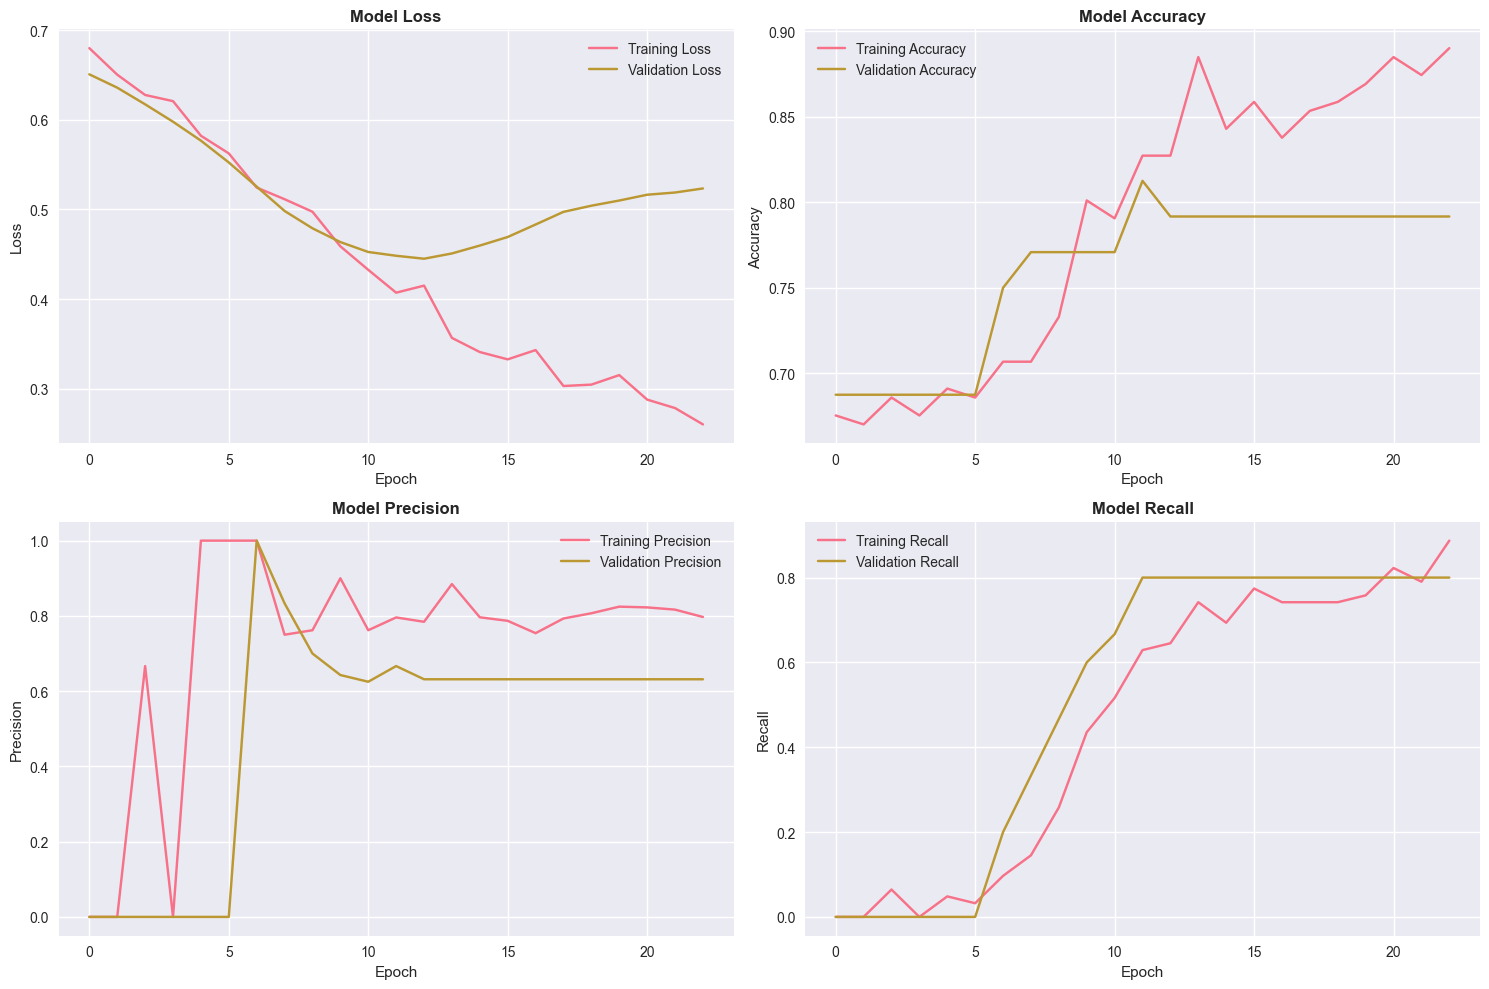

In [16]:
# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 1].set_title('Model Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Precision
axes[1, 0].plot(history.history['precision'], label='Training Precision')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
axes[1, 0].set_title('Model Precision', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()

# Recall
axes[1, 1].plot(history.history['recall'], label='Training Recall')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
axes[1, 1].set_title('Model Recall', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [17]:
# Create results summary
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'Precision': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'ROC-AUC': [results[model]['roc_auc'] for model in results.keys()]
})

# Sort by ROC-AUC
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("📈 Model Performance Summary:")
print("=" * 80)
display(results_df.round(4))

print(f"\n🏆 Best Performing Model: {results_df.iloc[0]['Model']}")
print(f"🎯 Best ROC-AUC Score: {results_df.iloc[0]['ROC-AUC']:.4f}")

📈 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.8333,0.8000,0.6316,0.7059,0.8915
0,Logistic Regression,0.8167,0.7857,0.5789,0.6667,0.8588
3,LightGBM,0.8333,0.8462,0.5789,0.6875,0.8485
4,SVM,0.7667,0.7273,0.4211,0.5333,0.8447
6,Deep Learning,0.8000,0.7692,0.5263,0.6250,0.8395
2,XGBoost,0.8167,0.8333,0.5263,0.6452,0.8318
5,K-Nearest Neighbors,0.7000,0.5714,0.2105,0.3077,0.8004



🏆 Best Performing Model: Random Forest
🎯 Best ROC-AUC Score: 0.8915


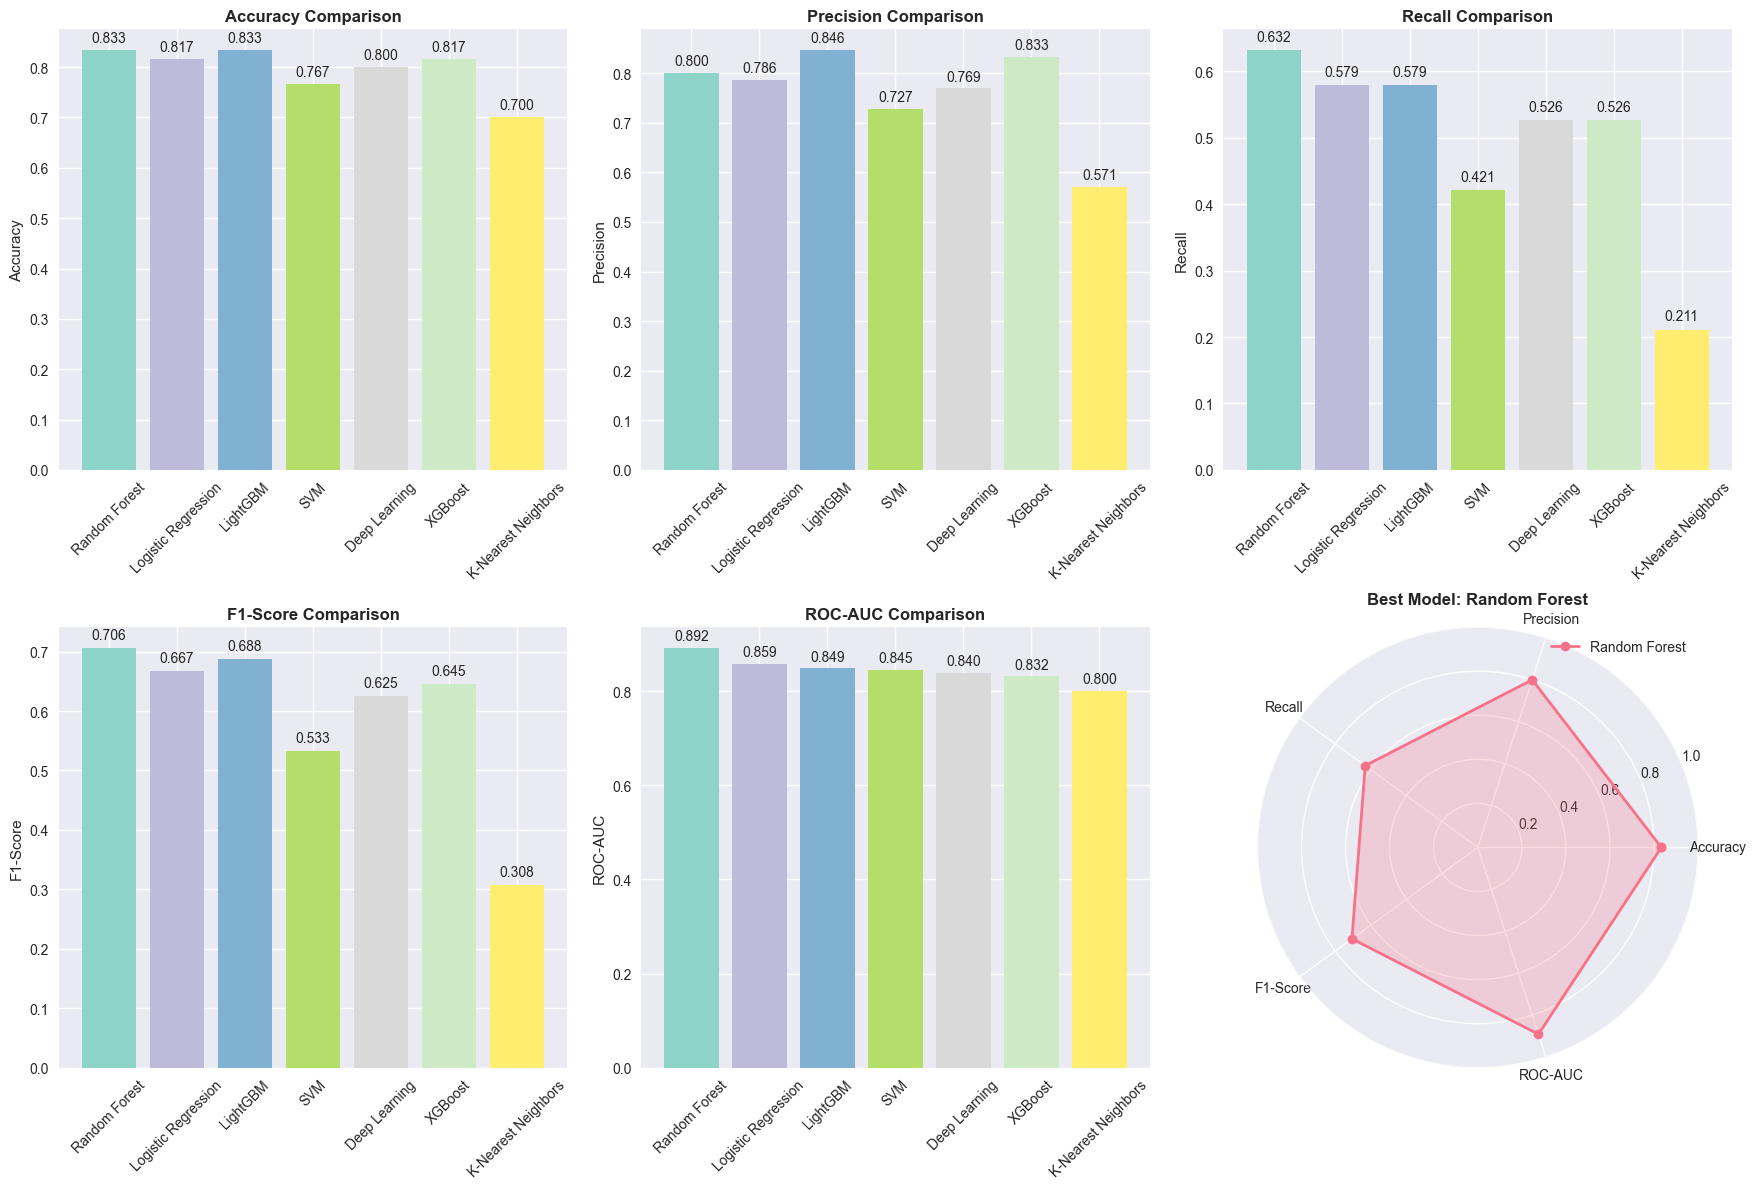

In [18]:
# Model comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = plt.cm.Set3(np.linspace(0, 1, len(results_df)))

for i, metric in enumerate(metrics):
    bars = axes[i].bar(results_df['Model'], results_df[metric], color=colors)
    axes[i].set_title(f'{metric} Comparison', fontweight='bold')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom')

# Overall performance radar chart for best model
axes[5].remove()
ax_radar = fig.add_subplot(2, 3, 6, projection='polar')

best_model_data = results_df.iloc[0]
metrics_values = [best_model_data[metric] for metric in metrics]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
metrics_values += metrics_values[:1]  # Complete the circle
angles = np.concatenate((angles, [angles[0]]))

ax_radar.plot(angles, metrics_values, 'o-', linewidth=2, label=best_model_data['Model'])
ax_radar.fill(angles, metrics_values, alpha=0.25)
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(metrics)
ax_radar.set_ylim(0, 1)
ax_radar.set_title(f'Best Model: {best_model_data["Model"]}', fontweight='bold')
ax_radar.legend()

plt.tight_layout()
plt.show()

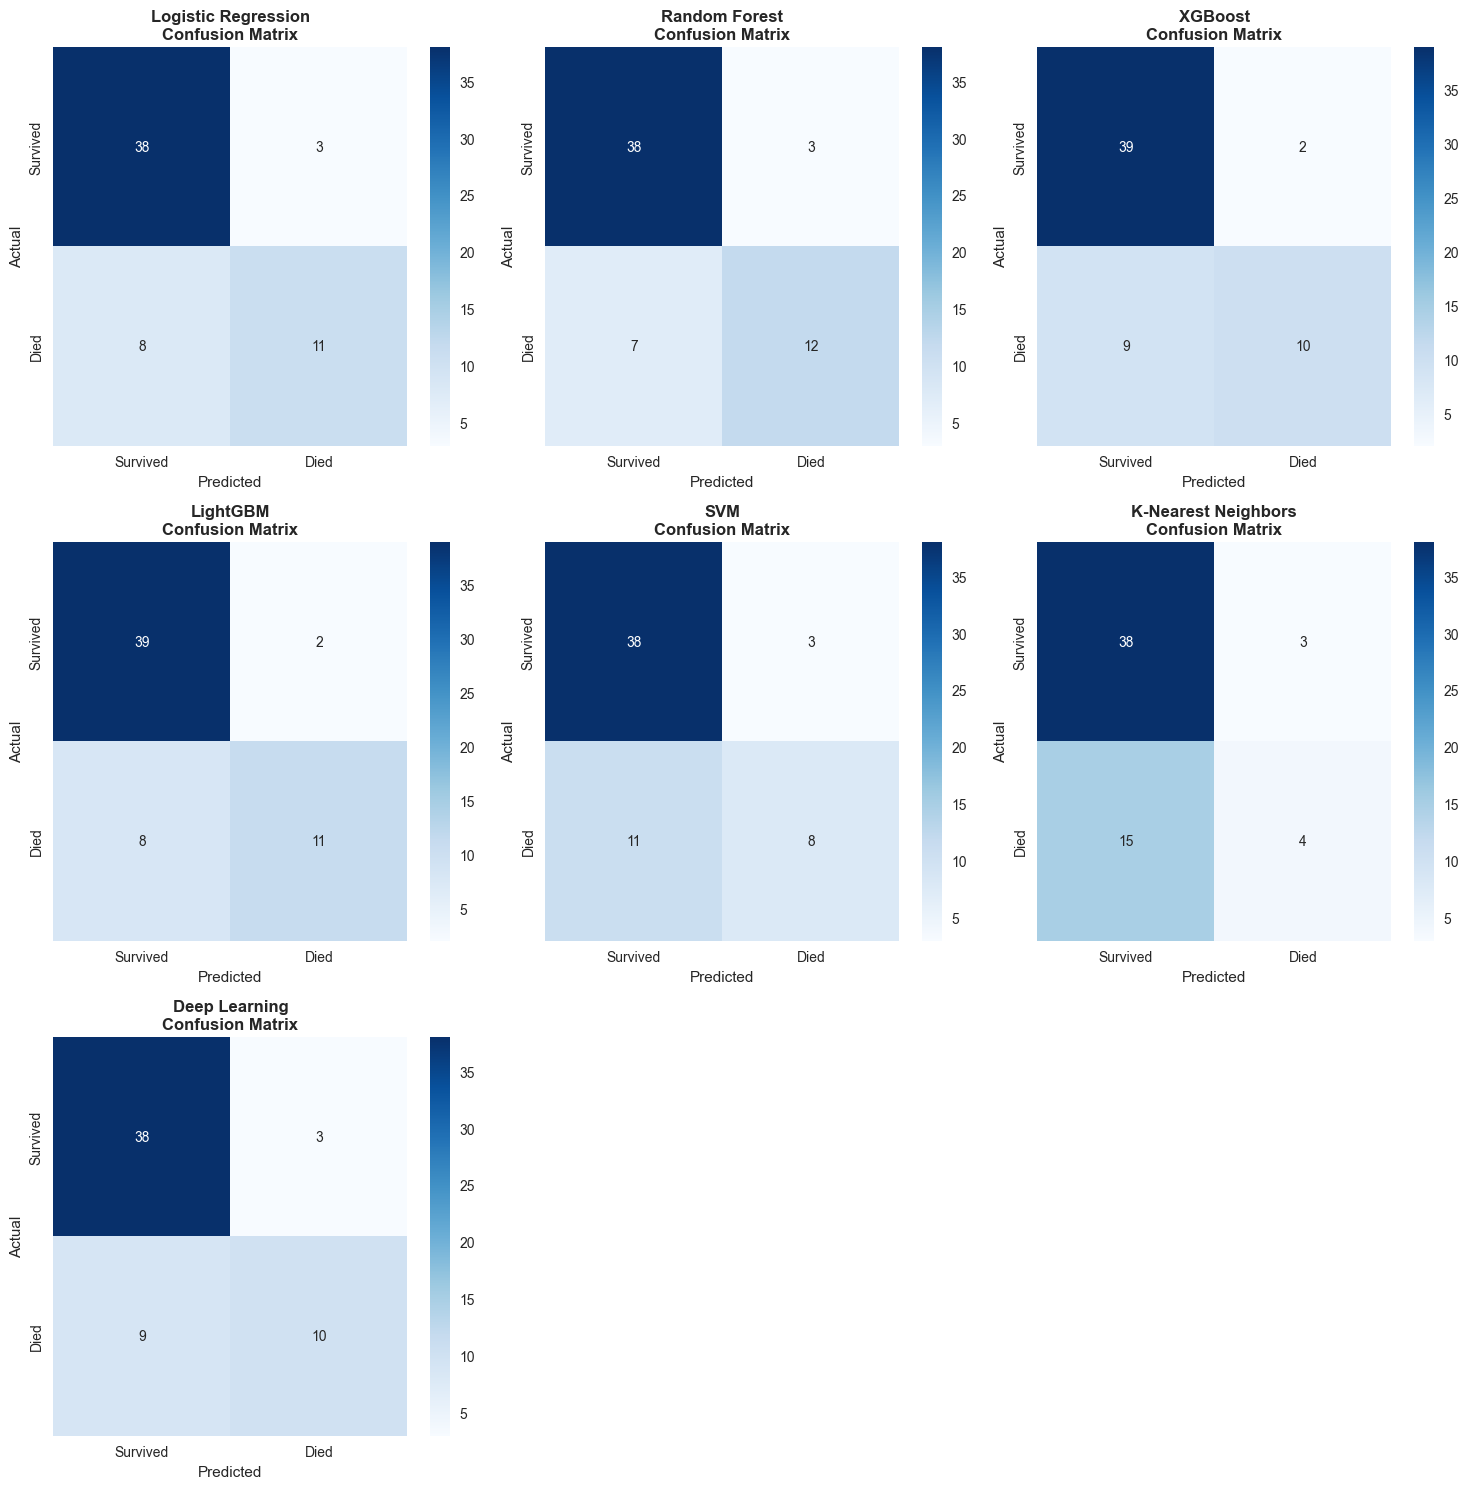

In [19]:
# Plot confusion matrices for all models
n_models = len(results)
cols = 3
rows = (n_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
if rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, (model_name, model_results) in enumerate(results.items()):
    cm = confusion_matrix(y_test, model_results['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
               xticklabels=['Survived', 'Died'],
               yticklabels=['Survived', 'Died'])
    axes[i].set_title(f'{model_name}\nConfusion Matrix', fontweight='bold')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Remove empty subplots
for i in range(len(results), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

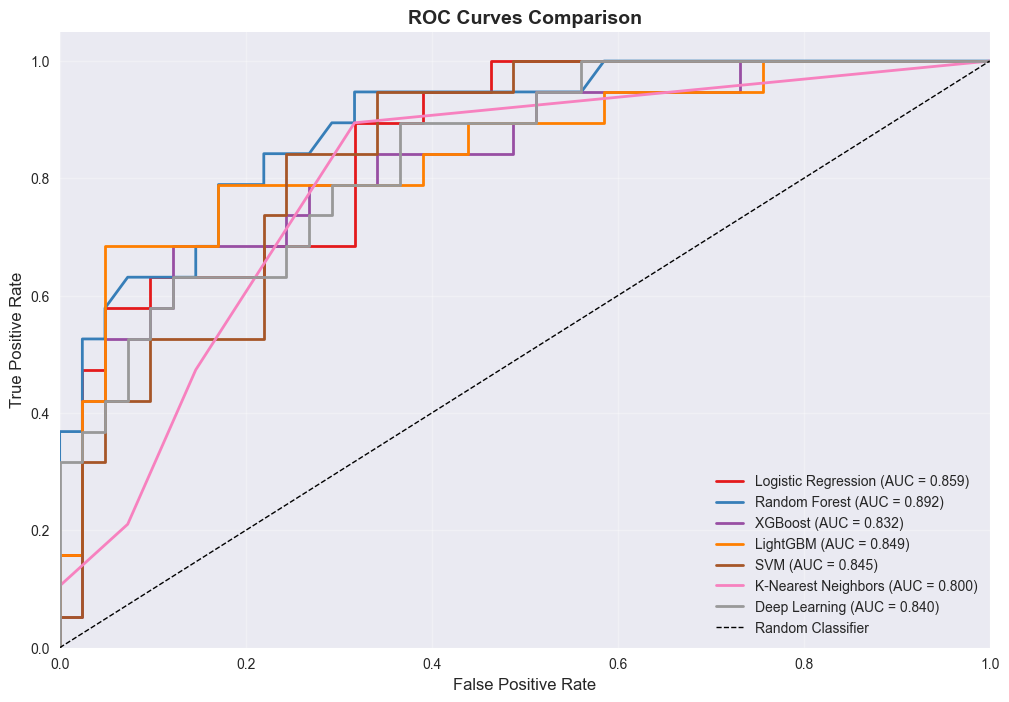

In [20]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

colors = plt.cm.Set1(np.linspace(0, 1, len(results)))

for i, (model_name, model_results) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, model_results['y_pred_proba'])
    auc_score = model_results['roc_auc']
    
    plt.plot(fpr, tpr, color=colors[i], linewidth=2,
            label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
# Get the best tree-based model for SHAP analysis
tree_models = ['Random Forest', 'XGBoost', 'LightGBM']
best_tree_model = None
best_tree_score = 0

for model_name in tree_models:
    if model_name in results:
        if results[model_name]['roc_auc'] > best_tree_score:
            best_tree_score = results[model_name]['roc_auc']
            best_tree_model = model_name

print(f"🌳 Using {best_tree_model} for SHAP analysis...")
print(f"📊 Model ROC-AUC: {best_tree_score:.4f}")

🌳 Using Random Forest for SHAP analysis...
📊 Model ROC-AUC: 0.8915


In [22]:
# SHAP Analysis
if best_tree_model:
    model = results[best_tree_model]['model']
    
    # Create SHAP explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # Handle different SHAP output formats
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # For binary classification, use positive class
    
    feature_names = X_train.columns.tolist()
    
    print("📊 SHAP Analysis completed!")
else:
    print("❌ No tree-based model available for SHAP analysis")

📊 SHAP Analysis completed!


<Figure size 1200x800 with 0 Axes>

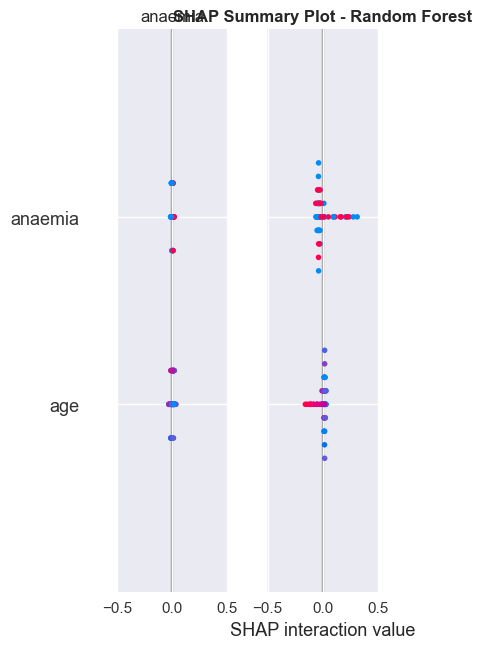

In [23]:
# SHAP Summary Plot
if best_tree_model:
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
    plt.title(f'SHAP Summary Plot - {best_tree_model}', fontweight='bold')
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

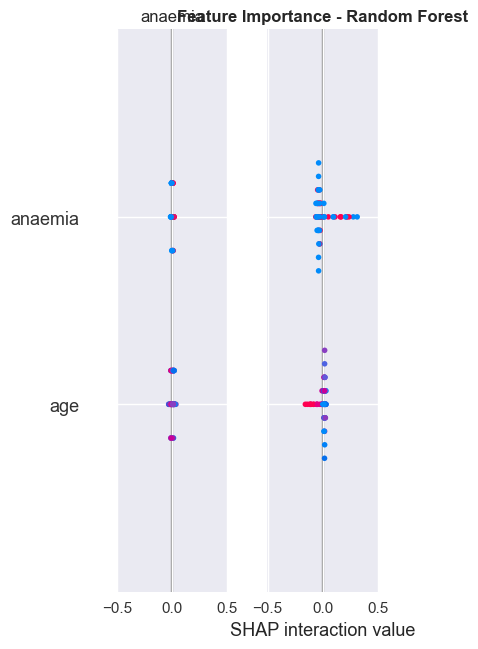

In [24]:
# SHAP Feature Importance Bar Plot
if best_tree_model:
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, 
                     plot_type="bar", show=False)
    plt.title(f'Feature Importance - {best_tree_model}', fontweight='bold')
    plt.tight_layout()
    plt.show()

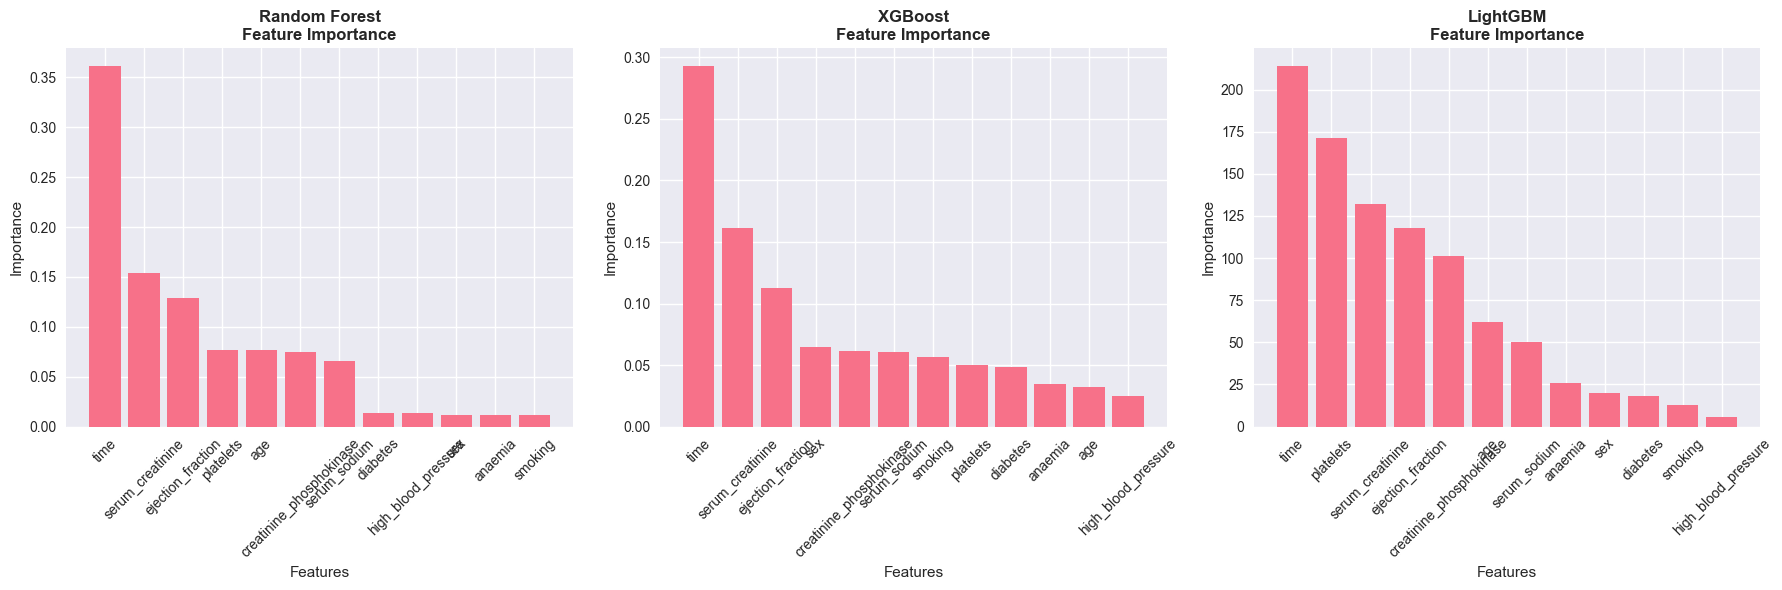

🏆 Feature Importance Rankings:

Random Forest:
  1. time: 0.3614
  2. serum_creatinine: 0.1541
  3. ejection_fraction: 0.1291
  4. platelets: 0.0768
  5. age: 0.0768

XGBoost:
  1. time: 0.2930
  2. serum_creatinine: 0.1611
  3. ejection_fraction: 0.1126
  4. sex: 0.0650
  5. creatinine_phosphokinase: 0.0611

LightGBM:
  1. time: 214.0000
  2. platelets: 171.0000
  3. serum_creatinine: 132.0000
  4. ejection_fraction: 118.0000
  5. creatinine_phosphokinase: 101.0000


In [25]:
# Traditional feature importance for tree-based models
tree_models_available = [model for model in tree_models if model in results]

if tree_models_available:
    fig, axes = plt.subplots(1, len(tree_models_available), 
                            figsize=(6 * len(tree_models_available), 6))
    if len(tree_models_available) == 1:
        axes = [axes]
    
    feature_names = X_train.columns.tolist()
    
    for i, model_name in enumerate(tree_models_available):
        model = results[model_name]['model']
        
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            
            axes[i].bar(range(len(importances)), importances[indices])
            axes[i].set_title(f'{model_name}\nFeature Importance', fontweight='bold')
            axes[i].set_xlabel('Features')
            axes[i].set_ylabel('Importance')
            axes[i].set_xticks(range(len(importances)))
            axes[i].set_xticklabels([feature_names[i] for i in indices], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print feature importance rankings
    print("🏆 Feature Importance Rankings:")
    for model_name in tree_models_available:
        model = results[model_name]['model']
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            
            print(f"\n{model_name}:")
            for i in range(min(5, len(indices))):
                print(f"  {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

In [26]:
# Save the best model
if best_model:
    model_name, model = best_model
    filename = f"best_heart_failure_model_{model_name.lower().replace(' ', '_')}.pkl"
    
    try:
        # Save the model with all necessary components
        model_package = {
            'model': model,
            'scaler': scaler,
            'model_name': model_name,
            'performance': results[model_name],
            'feature_names': X_train.columns.tolist(),
            'best_score': best_score
        }
        
        joblib.dump(model_package, filename)
        
        print(f"✅ Best model ({model_name}) saved as '{filename}'")
        print(f"   ROC-AUC Score: {best_score:.4f}")
        
        # Save model information
        model_info = {
            'Model Name': model_name,
            'ROC-AUC Score': best_score,
            'Accuracy': results[model_name]['accuracy'],
            'Precision': results[model_name]['precision'],
            'Recall': results[model_name]['recall'],
            'F1-Score': results[model_name]['f1_score']
        }
        
        info_filename = filename.replace('.pkl', '_info.txt')
        with open(info_filename, 'w') as f:
            f.write("Heart Failure Mortality Prediction - Best Model Info\n")
            f.write("=" * 50 + "\n\n")
            for key, value in model_info.items():
                f.write(f"{key}: {value}\n")
        
        print(f"📄 Model information saved as '{info_filename}'")
        
    except Exception as e:
        print(f"❌ Error saving model: {e}")
else:
    print("❌ No model to save!")

✅ Best model (Random Forest) saved as 'best_heart_failure_model_random_forest.pkl'
   ROC-AUC Score: 0.8915
📄 Model information saved as 'best_heart_failure_model_random_forest_info.txt'


In [27]:
print("🎉 HEART FAILURE MORTALITY PREDICTION - ANALYSIS COMPLETE!")
print("=" * 70)

print(f"\n📊 Dataset Summary:")
print(f"   • Total samples: {len(data)}")
print(f"   • Features: {len(X.columns)}")
print(f"   • Mortality rate: {(data['DEATH_EVENT'].sum() / len(data) * 100):.1f}%")

print(f"\n🏆 Best Performing Model: {best_model[0]}")
print(f"   • ROC-AUC Score: {best_score:.4f}")
print(f"   • Accuracy: {results[best_model[0]]['accuracy']:.4f}")
print(f"   • Precision: {results[best_model[0]]['precision']:.4f}")
print(f"   • Recall: {results[best_model[0]]['recall']:.4f}")
print(f"   • F1-Score: {results[best_model[0]]['f1_score']:.4f}")

print(f"\n📈 Model Rankings (by ROC-AUC):")
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    print(f"   {i}. {row['Model']}: {row['ROC-AUC']:.4f}")

if best_tree_model:
    print(f"\n🔍 Key Insights from Feature Importance ({best_tree_model}):")
    model = results[best_tree_model]['model']
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X_train.columns.tolist()
        
        print(f"   • Most important features:")
        for i in range(min(3, len(indices))):
            print(f"     - {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

print(f"\n📋 Recommendations:")
print(f"   1. The {best_model[0]} model shows the best performance")
print(f"   2. Consider hyperparameter tuning for further improvement")
print(f"   3. Validate the model on external datasets")
print(f"   4. Implement proper clinical validation before deployment")
print(f"   5. Monitor model performance over time")

print(f"\n💾 Saved Files:")
print(f"   • Model: {filename}")
print(f"   • Info: {info_filename}")

print(f"\n🚀 Next Steps:")
print(f"   • Load the saved model for predictions on new data")
print(f"   • Implement model monitoring and retraining pipeline")
print(f"   • Create a web application for clinical use")
print(f"   • Conduct prospective validation studies")

🎉 HEART FAILURE MORTALITY PREDICTION - ANALYSIS COMPLETE!

📊 Dataset Summary:
   • Total samples: 299
   • Features: 12
   • Mortality rate: 32.1%

🏆 Best Performing Model: Random Forest
   • ROC-AUC Score: 0.8915
   • Accuracy: 0.8333
   • Precision: 0.8000
   • Recall: 0.6316
   • F1-Score: 0.7059

📈 Model Rankings (by ROC-AUC):
   1. Random Forest: 0.8915
   2. Logistic Regression: 0.8588
   3. LightGBM: 0.8485
   4. SVM: 0.8447
   5. Deep Learning: 0.8395
   6. XGBoost: 0.8318
   7. K-Nearest Neighbors: 0.8004

🔍 Key Insights from Feature Importance (Random Forest):
   • Most important features:
     - time: 0.3614
     - serum_creatinine: 0.1541
     - ejection_fraction: 0.1291

📋 Recommendations:
   1. The Random Forest model shows the best performance
   2. Consider hyperparameter tuning for further improvement
   3. Validate the model on external datasets
   4. Implement proper clinical validation before deployment
   5. Monitor model performance over time

💾 Saved Files:
   • 

In [28]:
# Example: How to make predictions with the best model
def make_prediction(patient_data, model, scaler, model_name):
    """
    Make prediction for a single patient.
    """
    # Use scaled data if needed
    if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        patient_scaled = scaler.transform(patient_data)
        prediction = model.predict(patient_scaled)[0]
        probability = model.predict_proba(patient_scaled)[0, 1]
    else:
        prediction = model.predict(patient_data)[0]
        probability = model.predict_proba(patient_data)[0, 1]
    
    return prediction, probability

# Example patient data
sample_patient = pd.DataFrame({
    'age': [75],
    'anaemia': [1],
    'creatinine_phosphokinase': [582],
    'diabetes': [0],
    'ejection_fraction': [20],
    'high_blood_pressure': [1],
    'platelets': [265000],
    'serum_creatinine': [1.9],
    'serum_sodium': [130],
    'sex': [1],
    'smoking': [0],
    'time': [4]
})

print("🔮 Example Prediction:")
print("Patient Profile:")
for col, val in sample_patient.iloc[0].items():
    print(f"  {col}: {val}")

# Make prediction using the best model
prediction, probability = make_prediction(sample_patient, best_model[1], scaler, best_model[0])

print(f"\n🎯 Prediction Results ({best_model[0]}):")
print(f"  Prediction: {'High Risk' if prediction == 1 else 'Low Risk'}")
print(f"  Mortality Probability: {probability:.3f} ({probability*100:.1f}%)")
print(f"  Risk Level: {'HIGH' if probability > 0.7 else 'MODERATE' if probability > 0.3 else 'LOW'}")

🔮 Example Prediction:
Patient Profile:
  age: 75.0
  anaemia: 1.0
  creatinine_phosphokinase: 582.0
  diabetes: 0.0
  ejection_fraction: 20.0
  high_blood_pressure: 1.0
  platelets: 265000.0
  serum_creatinine: 1.9
  serum_sodium: 130.0
  sex: 1.0
  smoking: 0.0
  time: 4.0

🎯 Prediction Results (Random Forest):
  Prediction: High Risk
  Mortality Probability: 0.980 (98.0%)
  Risk Level: HIGH
